In [57]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from pandas import DataFrame
import sys
import pylab
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [2]:

#import dataset 
df=pd.read_csv('F:\MSFE\IE517 MLF\HW4\housing.csv')
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


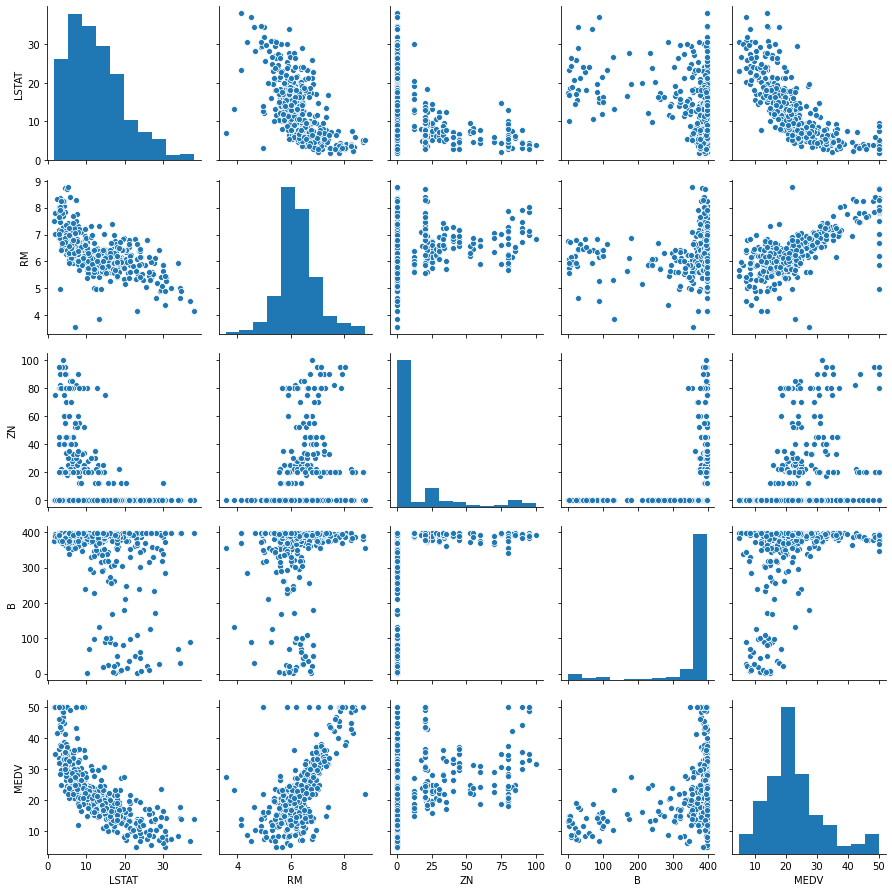

In [3]:
cols = ['LSTAT','RM','ZN','B','MEDV']
sns.pairplot(df[cols],height=2.5)
plot.tight_layout()
plot.show()

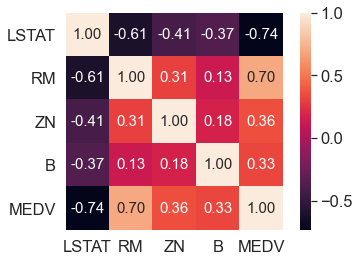

In [4]:

cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.5)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', 
                annot_kws = {'size':15}, yticklabels=cols, xticklabels=cols)
plot.show()

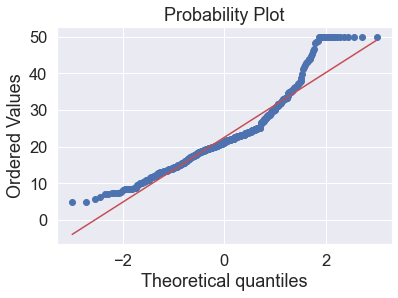

In [5]:
stats.probplot(df['MEDV'],dist='norm',plot=pylab)
pylab.show()

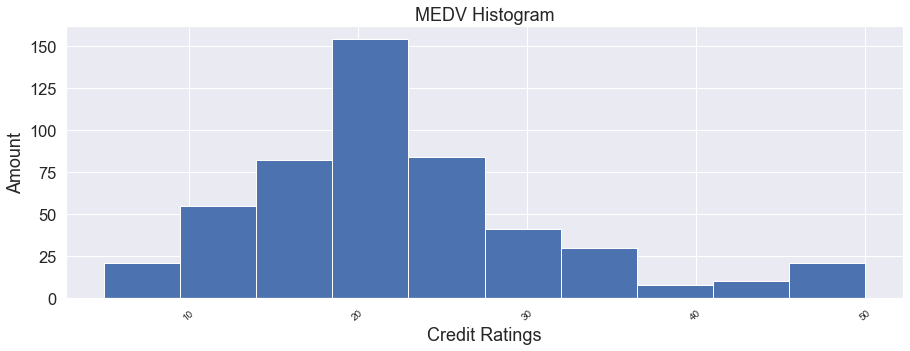

In [6]:
plot.figure(figsize=(15,5))
plot.xlabel('Credit Ratings')
plot.ylabel('Amount')
plot.title('MEDV Histogram')
plot.xticks(fontsize = 10, rotation = 40)
medv = df['MEDV']
_=plot.hist(medv)

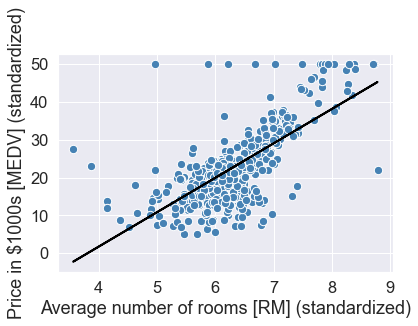

In [113]:
X=df[['RM']].values
y=df['MEDV'].values
slr = LinearRegression()
slr.fit(X,y)
def lin_regplot(X,y,model):
    plot.scatter(X,y, c= 'steelblue', edgecolor = 'white', s=70)
    plot.plot(X,model.predict(X),color='black',lw=2)
    return None

lin_regplot(X,y,slr)
plot.xlabel('Average number of rooms [RM] (standardized)')
plot.ylabel('Price in $1000s [MEDV] (standardized)')
plot.show()


['Slope: -0.113', 'Slope: 0.030', 'Slope: 0.040', 'Slope: 2.784', 'Slope: -17.203', 'Slope: 4.439', 'Slope: -0.006', 'Slope: -1.448', 'Slope: 0.262', 'Slope: -0.011', 'Slope: -0.915', 'Slope: 0.012', 'Slope: -0.509']
Intercept: 30.247


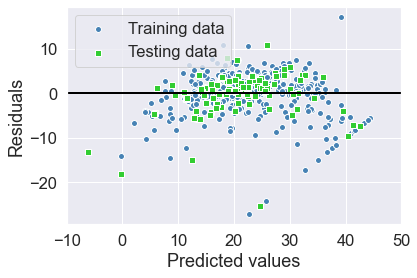

MES train:21.641, test:24.291
R^2 train:0.751, test:0.669


In [117]:
# Split data into training and test sets by using SKlearn
from sklearn.model_selection import train_test_split
X=df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42 )
slr=LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

#coefficients and y intercept
irange=np.arange(0,13)
a=[]
for k in irange:
     a.append('Slope: %.3f' % slr.coef_[k])
print(a)
print('Intercept: %.3f' % slr.intercept_)

# plot the residual errors
plot.scatter(y_train_pred, y_train_pred - y_train, c='steelblue', marker="o",edgecolor='white',label='Training data')
plot.scatter(y_test_pred, y_test_pred - y_test, c='limegreen', marker="s",edgecolor='white',label='Testing data')
plot.xlabel('Predicted values')
plot.ylabel('Residuals')
plot.legend(loc='upper left')
plot.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plot.xlim([-10,50])
plot.show()

# calculate MSE
print('MES train:%.3f, test:%.3f'%(
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred)))

# calculate R2
print('R^2 train:%.3f, test:%.3f'%
      (r2_score(y_train, y_train_pred),
       r2_score(y_test, y_test_pred)))

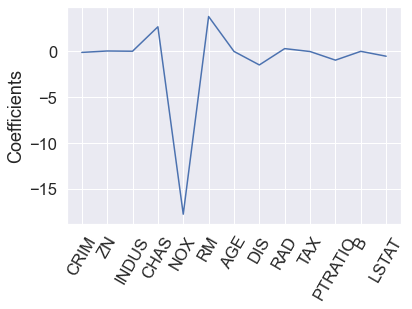

In [137]:
x=df.iloc[:, :-1].columns
slr_coef = slr.fit(X,y).coef_
_=plot.plot(range(len(x)),slr_coef)
_=plot.xticks(range(len(x)),x,rotation=60)
_=plot.ylabel('Coefficients')
plot.show()

['Slope: -0.090', 'Slope: 0.015', 'Slope: -0.024', 'Slope: 3.019', 'Slope: -10.712', 'Slope: 4.484', 'Slope: -0.007', 'Slope: -0.995', 'Slope: 0.105', 'Slope: -0.004', 'Slope: -0.799', 'Slope: 0.011', 'Slope: -0.454']
Intercept: 21.849


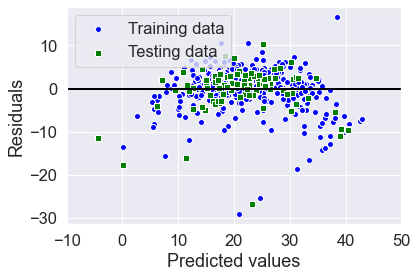

MES train:22.325, test:24.881
R^2 train:0.743, test:0.661


In [121]:
# Split data into training and test sets by using Ridge
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42 )
ridge=Ridge( alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
y_ridge_train_pred = ridge.predict(X_train)
y_ridge_test_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

irange=np.arange(0,13)
a=[]
for k in irange:
     a.append('Slope: %.3f' % ridge.coef_[k])
print(a)
print('Intercept: %.3f' % ridge.intercept_)

# plot the residual errors (Ridge)
plot.scatter(y_ridge_train_pred, y_ridge_train_pred - y_train, c='blue', marker="o",edgecolor='white',label='Training data')
plot.scatter(y_ridge_test_pred, y_ridge_test_pred - y_test, c='green', marker="s",edgecolor='white',label='Testing data')
plot.xlabel('Predicted values')
plot.ylabel('Residuals')
plot.legend(loc='upper left')
plot.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plot.xlim([-10,50])
plot.show()
# calculate MSE
print('MES train:%.3f, test:%.3f'%(
    mean_squared_error(y_train, y_ridge_train_pred),
    mean_squared_error(y_test, y_ridge_test_pred)))
# calculate R2
print('R^2 train:%.3f, test:%.3f'%
      (r2_score(y_train, y_ridge_train_pred),
       r2_score(y_test, y_ridge_test_pred)))

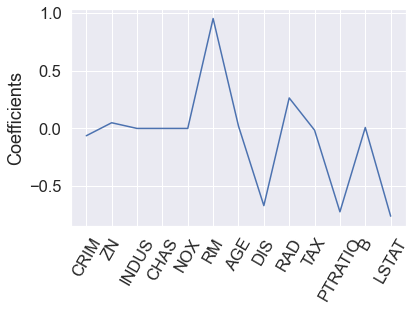

In [138]:

ridge_coef = ridge.fit(X,y).coef_
_=plot.plot(range(len(x)),ridge_coef)
_=plot.xticks(range(len(x)),x,rotation=60)
_=plot.ylabel('Coefficients')
plot.show()

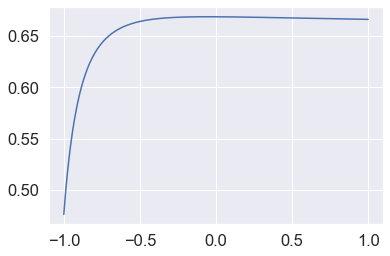

-0.052000000000000046
0.668780817139786


In [141]:
#Which alpha gives the best performing model?
begin=-1
end=1
krange=np.arange(begin,end,0.001)
testscores=[]

for k in krange:
    ridge = Ridge(alpha=k )
    ridge.fit(X_train,y_train)
    y_ridge_train_pred = ridge.predict(X_train)
    y_ridge_test_pred = ridge.predict(X_test)
    ridge.score(X_test, y_test)
    testscores.append(ridge.score(X_test,y_test))
    


maxridge=max(testscores)
max_index=testscores.index(maxridge)
best_alpha=max_index/1000+begin
plot.plot(krange,testscores )
plot.show()
print(best_alpha)  
print(maxridge)

['Slope: -0.000', 'Slope: 0.000', 'Slope: -0.000', 'Slope: 0.000', 'Slope: -0.000', 'Slope: 3.543', 'Slope: -0.000', 'Slope: 0.000', 'Slope: -0.000', 'Slope: -0.000', 'Slope: -0.265', 'Slope: 0.000', 'Slope: -0.437']
Intercept: 10.720


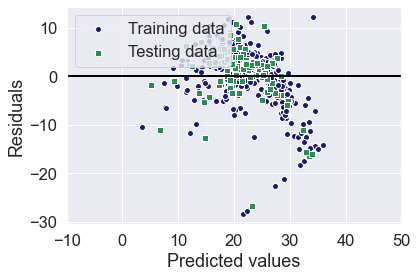

In [132]:
# Split data into training and test sets by using Lasso
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42 )
lasso=Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
y_lasso_train_pred = lasso.predict(X_train)
y_lasso_test_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

irange=np.arange(0,13)
a=[]
for k in irange:
     a.append('Slope: %.3f' % lasso.coef_[k])
print(a)
print('Intercept: %.3f' % lasso.intercept_)

# plot the residual errors (Lidge)
plot.scatter(y_lasso_train_pred, y_lasso_train_pred - y_train, c='midnightblue', marker="o",edgecolor='white',label='Training data')
plot.scatter(y_lasso_test_pred, y_lasso_test_pred - y_test, c='seagreen', marker="s",edgecolor='white',label='Testing data')
plot.xlabel('Predicted values')
plot.ylabel('Residuals')
plot.legend(loc='upper left')
plot.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plot.xlim([-10,50])
plot.show()

# calculate MSE
print('MES train:%.3f, test:%.3f'%(
    mean_squared_error(y_train, y_lasso_train_pred),
    mean_squared_error(y_test, y_lasso_test_pred)))

# calculate R2
print('R^2 train:%.3f, test:%.3f'%
      (r2_score(y_train, y_lasso_train_pred),
       r2_score(y_test, y_lasso_test_pred)))

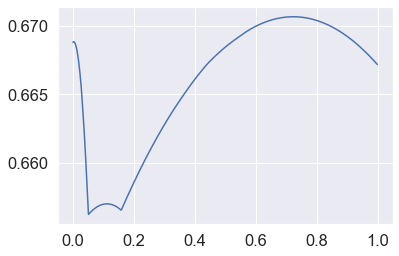

0.724
0.6706502105352474


In [126]:
# Which alpha gives the best performing model?
begin=0.001
end=1
krange=np.arange(begin,end,0.001)
testscores=[]

for k in krange:
    ridge = Lasso(alpha=k)
    ridge.fit(X_train,y_train)
    y_ridge_train_pred = ridge.predict(X_train)
    y_ridge_test_pred = ridge.predict(X_test)
    ridge.score(X_test, y_test)
    testscores.append(ridge.score(X_test,y_test))
    
maxridge=max(testscores)
max_index=testscores.index(maxridge)
best_alpha=max_index/1000+begin
plot.plot(krange,testscores )
plot.show()
print(best_alpha)
print(maxridge)

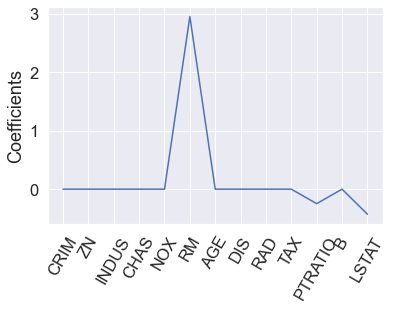

In [139]:
lasso_coef = lasso.fit(X,y).coef_
_=plot.plot(range(len(x)),lasso_coef)
_=plot.xticks(range(len(x)),x,rotation=60)
_=plot.ylabel('Coefficients')
plot.show()

In [140]:
print("Ziheng Wu")
print("My NetID is: zihengw5")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

Ziheng Wu
My NetID is: zihengw5
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
